# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import os as os
import matplotlib.pyplot as plt
import csv as csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

lat = np.random.uniform(low=-90.00, high=90.00, size=500)
lon = np.random.uniform(low=-180.00, high=180.00, size=500)


In [23]:
latlong = zip(lat, lon)

## Generate Cities List

In [24]:
cities = []
for c in latlong:
    cities.append(citipy.nearest_city(c[0], c[1]))

In [25]:
city_name=[]
for city in cities:
    name = city.city_name
    city_name.append(name)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []

# Build query URL
for city in city_name:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        names.append(response["name"])

In [27]:
weather = pd.DataFrame({"City": names,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather.head()

,City,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Dunedin,53.01,51,100,3.00,-45.87,170.50
1,Juneau,56.73,62,90,6.93,58.30,-134.42
2,Saint-Pierre,51.48,93,75,12.75,48.95,4.24
3,Kenai,61.39,71,1,8.05,60.55,-151.26
4,Laguna,89.60,40,40,16.11,27.52,-110.01


In [28]:
len(weather)

460

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

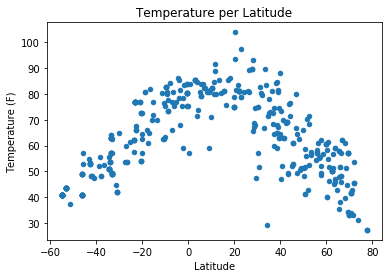

In [29]:
weather.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude")
plt.savefig('Temp_perLat.png')

#### Latitude vs. Humidity Plot

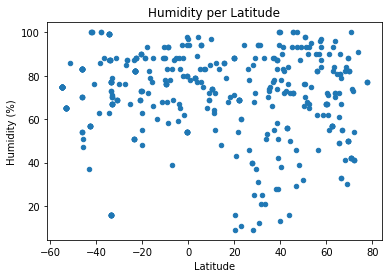

In [30]:
weather.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude")
plt.savefig('HumidityperLat.png')

#### Latitude vs. Cloudiness Plot

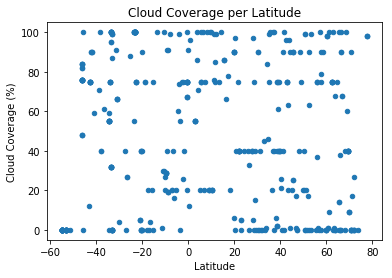

In [31]:
weather.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude")
plt.savefig('CloudperLat.png')

#### Latitude vs. Wind Speed Plot

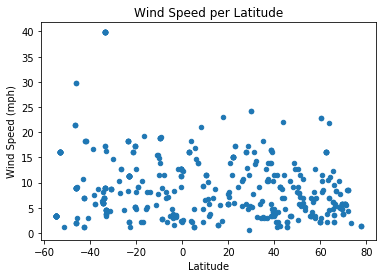

In [32]:
weather.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude")
plt.savefig('WindperLat.png')